In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import files
import os

# please upload your own kaggle.json file (token that can be requested through your kaggle account)
print("Please upload your kaggle.json file (download from https://www.kaggle.com/account)")

uploaded = files.upload()

# Move it to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key uploaded successfully!")

Please upload your kaggle.json file (download from https://www.kaggle.com/account)


Saving kaggle.json to kaggle.json
Kaggle API key uploaded successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!kaggle datasets download -d sripaadsrinivasan/audio-mnist

Dataset URL: https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist
License(s): CC0-1.0


In [5]:
import zipfile

# Unzip into a directory called 'audio_mnist_data'
!unzip -q audio-mnist.zip -d audio_mnist_data

print("Dataset downloaded and extracted successfully!")

Dataset downloaded and extracted successfully!


In [6]:
!ls audio_mnist_data

data


In [7]:
# List contents of the extracted dataset
# print(os.listdir("audio_mnist_data"))
# print(sorted(os.listdir("audio_mnist_data/data")))
# print(len(os.listdir("audio_mnist_data/data/01")))
data_dir = "audio_mnist_data/data/"

text_file= data_dir+"audioMNIST_meta.txt"
# open the text file
f = open(text_file, "r")


data=f.read()
#print(data)

# **Gender Recogntion**

In [ ]:
# list of all the folder id
folder_id=list(range(1,60))

# list to store all the gender
gender_list=[]

# looping for each data in the text
for i in range(len(data)-6):
    # finding the word gender in the data
    if data[i:i+6]=="gender":

        # extracting the affiliated gender
        txt=data[i+10:i+16]

        # since male and female have different count of alphabets
        # preprocessing the data to get the actual text
        if txt[-2]=='"':
            txt=txt[:len(txt)-2]

        # appending the gender into the list
        gender_list.append(txt.split(","))

# creating a dictonary that keeps track of folder id and associated gender
folder_dict=dict(zip(folder_id,gender_list))
print(folder_dict)

{1: ['male'], 2: ['male'], 3: ['male'], 4: ['male'], 5: ['male'], 6: ['male'], 7: ['male'], 8: ['male'], 9: ['male'], 10: ['male'], 11: ['male'], 12: ['female'], 13: ['male'], 14: ['male'], 15: ['male'], 16: ['male'], 17: ['male'], 18: ['male'], 19: ['male'], 20: ['male'], 21: ['male'], 22: ['male'], 23: ['male'], 24: ['male'], 25: ['male'], 26: ['female'], 27: ['male'], 28: ['female'], 29: ['male'], 30: ['male'], 31: ['male'], 32: ['male'], 33: ['male'], 34: ['male'], 35: ['male'], 36: ['female'], 37: ['male'], 38: ['male'], 39: ['male'], 40: ['male'], 41: ['male'], 42: ['male'], 43: ['female'], 44: ['male'], 45: ['male'], 46: ['male'], 47: ['female'], 48: ['male'], 49: ['male'], 50: ['male'], 51: ['male'], 52: ['female'], 53: ['male'], 54: ['male'], 55: ['male'], 56: ['female'], 57: ['female'], 58: ['female'], 59: ['female']}


In [ ]:
# save file names
file_names=[]

# save all gender of file names
gender=[]

# save all file id and gender
for dirname, _, filenames in os.walk('audio_mnist_data/data/'):
    for filename in filenames:
        file_origin=filename[2:4]
        if file_origin=='di':
            pass
        elif int(file_origin) in folder_dict:
            file_names.append(filename)
            gender.append(folder_dict[int(file_origin)])
        else:
            pass

In [ ]:
# create na new dataframe
meta_data = pd.DataFrame(gender,columns=['class'])
meta_data["file_name"]=file_names
meta_data.head()
meta_data.shape

(29500, 2)

In [ ]:
meta_data

,class,file_name
0,female,9_56_23.wav
1,female,1_56_44.wav
2,female,1_56_42.wav
3,female,9_56_38.wav
4,female,6_56_20.wav
...,...,...
29495,male,1_44_8.wav
29496,male,8_44_25.wav
29497,male,7_44_27.wav
29498,male,9_44_46.wav


In [ ]:
from tqdm import tqdm
import librosa
import numpy as np
import os

# do feature extraction using librosa
def features_extract(file_name):
    # load the audio file using 'soxr' for resampling
    audio, sample_rate = librosa.load(file_name, sr=None, res_type='soxr_vhq')  # 'soxr_vhq' is a very high-quality resampling method

    # extract the features
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)

    # feature scaling
    scaled_feature = np.mean(feature.T, axis=0)

    # return the scaled features
    return scaled_feature

# List containing all the features
extracted = []

# For each row in the csv
for index_num, row in tqdm(meta_data.iterrows()):

    # Get the file
    file_name = os.path.join(os.path.abspath(data_dir), row['file_name'][2:4]+'/', str(row['file_name']))

    # Get file label
    final_class_labels = row['class']

    # Extract feature
    data = features_extract(file_name)

    # Store it in a list
    extracted.append([data, final_class_labels])

29500it [05:45, 85.41it/s] 


In [ ]:
class_names=sorted(extracted_df['class'].unique().tolist())
class_names

['female', 'male']

In [ ]:
# create na new dataframe
extracted_df = pd.DataFrame(extracted,columns=['feature','class'])
extracted_df.head()

,feature,class
0,"[-691.3337, 95.84963, 27.544104, 29.28274, 29....",female
1,"[-698.1968, 117.762054, 42.40103, 20.921532, 2...",female
2,"[-707.7177, 110.488884, 30.850632, 12.671725, ...",female
3,"[-694.61115, 104.05802, 21.29978, 20.562786, 3...",female
4,"[-643.41565, 32.0328, -10.078201, 63.95842, -7...",female


In [ ]:
# get the data as a list and send it to np.array()
# function to convert it into an array
x = np.array(extracted_df['feature'].tolist())
y = np.array(extracted_df['class'].tolist())

## Audio Classification PyTorch

In [ ]:
import torch as pt
# from torch import nn
# import torchaudio as ta
# from torchsummary import summary

import numpy as numpy

import os
import subprocess
import tqdm as tqdm
import json

if pt.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Load data (assuming extracted_df is your DataFrame)
features = np.array(extracted_df['feature'].tolist())  # Convert list of features to np.array
labels = extracted_df['class']

# Encode labels (female -> 0, male -> 1)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Custom PyTorch Dataset
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create Dataset and DataLoader
train_dataset = FeatureDataset(X_train, y_train)
test_dataset = FeatureDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define a simple feed-forward neural network
class GenderClassifier(nn.Module):
    def __init__(self):
        super(GenderClassifier, self).__init__()
        self.fc1 = nn.Linear(features.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 classes: female, male

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = GenderClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Evaluate on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1/10, Loss: 0.016574397683143616
Epoch 2/10, Loss: 0.0013418336166068912
Epoch 3/10, Loss: 0.00015679612988606095
Epoch 4/10, Loss: 0.00048353566671721637
Epoch 5/10, Loss: 0.008465628139674664
Epoch 6/10, Loss: 0.07704132050275803
Epoch 7/10, Loss: 0.00023597375547979027
Epoch 8/10, Loss: 5.118457011121791e-06
Epoch 9/10, Loss: 0.00020196137484163046
Epoch 10/10, Loss: 0.00011471118341432884
Test Accuracy: 99.68%


In [ ]:
# Set model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    all_predictions = []
    for features, _ in test_loader:  # Assuming the DataLoader returns (features, labels)
        features = features.to(device)  # Move to the same device as the model (CPU/GPU)

        # Forward pass
        outputs = model(features)

        # If it's a classification model
        _, predicted = torch.max(outputs, 1)  # Get predicted class (index of max logit)

        all_predictions.extend(predicted.cpu().numpy())  # Move to CPU and convert to NumPy for readability

print("Predictions:", all_predictions)


Predictions: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1)

In [ ]:
import IPython.display as ipd
# play the file
ipd.Audio(file_name)

# Model Evaluation

In [ ]:
import numpy as np

# Get predictions using the model's forward method
with torch.no_grad():  # Disable gradient calculation during inference
    y_pred = model(torch.tensor(X_test, dtype=torch.float32))  # Convert x_test to a PyTorch tensor
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()  # Get predicted class indices as NumPy array

# Convert y_test to class indices if it's in one-hot encoded format
if y_test.ndim == 2:  # Check if y_test has 2 dimensions (one-hot encoded)
    y_true_classes = np.argmax(y_test, axis=1)
else:
    y_true_classes = y_test

# Identify misclassified instances
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

print(f"Number of misclassified instances: {len(misclassified_indices)}")

Number of misclassified instances: 48


In [ ]:
print(f"Number of misclassified instances: {len(misclassified_indices)}")
label_mapping = {0: "Female", 1: "Male"}
# Display and play misclassified audio samples
for idx in misclassified_indices[:10]:  # Show first 5 misclassified examples
    true_gender = label_mapping[y_true_classes[idx]]
    predicted_gender = label_mapping[y_pred_classes[idx]]
    print(f"Index: {idx} | True Label: {true_gender} | Predicted Label: {predicted_gender}")
    print(f"Playing audio: {file_names[idx]}")
    file_path = data_dir + file_names[idx][2:4] +"/" + file_names[idx]
    print(file_path)
    display(ipd.Audio(file_path))  # Play the audio file

Number of misclassified instances: 48
Index: 109 | True Label: Male | Predicted Label: Female
Playing audio: 9_56_45.wav
audio_mnist_data/data/56/9_56_45.wav


Index: 178 | True Label: Male | Predicted Label: Female
Playing audio: 9_56_0.wav
audio_mnist_data/data/56/9_56_0.wav


Index: 204 | True Label: Male | Predicted Label: Female
Playing audio: 5_56_3.wav
audio_mnist_data/data/56/5_56_3.wav


Index: 287 | True Label: Male | Predicted Label: Female
Playing audio: 2_56_5.wav
audio_mnist_data/data/56/2_56_5.wav


Index: 553 | True Label: Male | Predicted Label: Female
Playing audio: 1_36_11.wav
audio_mnist_data/data/36/1_36_11.wav


Index: 554 | True Label: Male | Predicted Label: Female
Playing audio: 8_36_22.wav
audio_mnist_data/data/36/8_36_22.wav


Index: 711 | True Label: Male | Predicted Label: Female
Playing audio: 7_36_49.wav
audio_mnist_data/data/36/7_36_49.wav


Index: 836 | True Label: Male | Predicted Label: Female
Playing audio: 1_36_34.wav
audio_mnist_data/data/36/1_36_34.wav


Index: 1286 | True Label: Male | Predicted Label: Female
Playing audio: 8_51_42.wav
audio_mnist_data/data/51/8_51_42.wav


Index: 1408 | True Label: Male | Predicted Label: Female
Playing audio: 8_51_8.wav
audio_mnist_data/data/51/8_51_8.wav


# Digit Recognition

In this second part, we start over from the beginning. First, we arrange the data.

In [8]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import random

def load_audio_files_and_labels(data_dir, max_files_per_folder=5):
    """
    Loads audio file paths and extracts labels from filenames, limiting to the first few files per folder.

    Args:
        data_dir (str): Path to the main directory containing speaker folders.
        max_files_per_folder (int): Maximum number of files to load per folder.

    Returns:
        List of tuples (file_path, label)
    """
    audio_data = []

    # Iterate through each speaker folder
    for speaker_folder in sorted(os.listdir(data_dir)):
        speaker_path = os.path.join(data_dir, speaker_folder)
        if os.path.isdir(speaker_path):
            ''' # List files and take only the first `max_files_per_folder` files
            wav_files = sorted(os.listdir(speaker_path))[:max_files_per_folder] '''
            # List all wav files in the folder
            wav_files = [f for f in os.listdir(speaker_path) if f.endswith(".wav")]
            # Randomly select up to max_files_per_folder files
            selected_files = random.sample(wav_files, min(max_files_per_folder, len(wav_files)))
            for wav_file in selected_files:
                wav_path = os.path.join(speaker_path, wav_file)
                # Extract the first character of the filename as the label
                label = int(wav_file[0])
                audio_data.append((wav_path, label))

    return audio_data

audio_files = load_audio_files_and_labels(data_dir, max_files_per_folder=100)




With the 100 loaded files per folder, we have 6000 files overall (for test, train and validation).

In [9]:
print(len(audio_files))

6000


Here we can also look at how the data is stored. As we can see, this is not the actual data (the audio files are not here), only the path to the data and the label of the file.

In [10]:
print(audio_files[:3])

[('audio_mnist_data/data/01/5_01_5.wav', 5), ('audio_mnist_data/data/01/9_01_8.wav', 9), ('audio_mnist_data/data/01/6_01_30.wav', 6)]


Let's also play a sample.

In [11]:
from IPython.display import Audio
print(audio_files[0][1])
Audio(audio_files[0][0])

5


Bellow we can see how the computer sees the audio files we will work with.

The sample rate measured in kHz tells us that the audio was recorded at 48,000 samples per second. Y has 29685 values, so this means that the audio file is 29685/48000=0.618 seconds long.

y is just a NumPy array containing the raw amplitude values of the audio signal over time. It’s what your computer “hears” when it plays the audio file. Each value represents the loudness (amplitude) of the audio at a specific point in time. While a single number, representing only the loudness at a particular moment, based on how fast the wave goes up and down (its frequency) we can also tell the note. That is how the whole audio file can be represented only by numbers (with librosa).

This is just a tiny snippet from the whole audio file (20 samples).

In [12]:
# Load the audio file
y, sr = librosa.load(audio_files[0][0], sr=None)  # Set sr=None to preserve the original sample rate

# Print the original sample rate (in Hz)
print(f"Original sample rate: {sr} Hz")

print ('Example shape ', y.shape, 'Sample rate ', sr, 'Data type', type(y))
print (y[22400:22420])

Original sample rate: 48000 Hz
Example shape  (36317,) Sample rate  48000 Data type <class 'numpy.ndarray'>
[-0.00213623 -0.0020752  -0.00192261 -0.00146484 -0.00146484 -0.00164795
 -0.00158691 -0.00152588 -0.0017395  -0.00204468 -0.00259399 -0.00265503
 -0.00271606 -0.00299072 -0.00305176 -0.00296021 -0.00280762 -0.00228882
 -0.00140381 -0.0007019 ]


And this is the waveform.

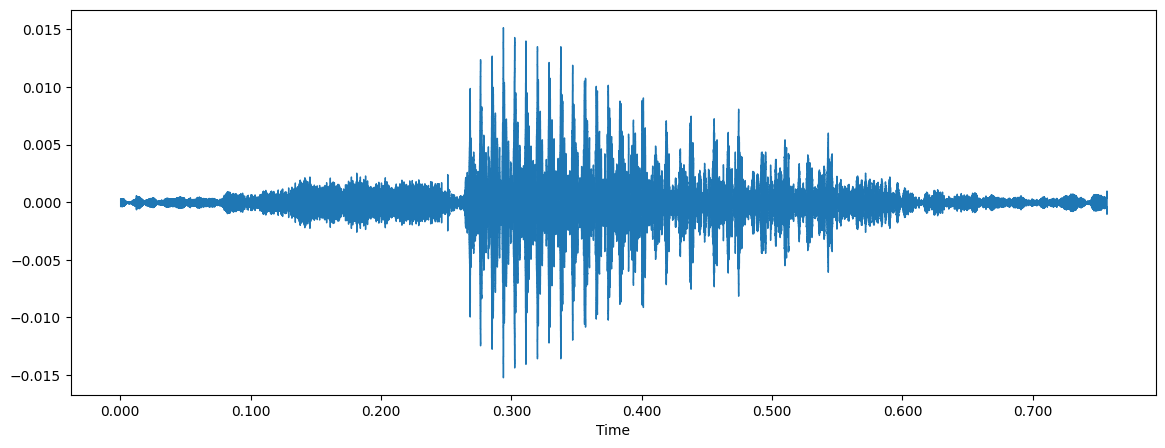

In [13]:
sr=48000
y, sr = librosa.load(audio_files[0][0], sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

Now, spectograms are made from each audio file. A spectogram is a visual representation of audio that shows how frequencies change over time. After having the spectograms, so images, we can just feed them to a Convolutional Neural Network.

*   The x-axis shows time
*   The y axis shows frequency (low to high notes)
*   And the color is amplitude (loudness) at that particular x time. Brighter = louder, darker = softer

To be even more certain, in most machine learning tasks (especially with speech recognition) developers do not use simple spectograms, but Mel Spectograms. The difference is that with Mel Spectograms, the mel scale is applied which makes the spectogram more representative of how humans hear. We’re better at hearing small pitch changes at low frequencies than high ones, so the mel scale and mel spectograms compresses high frequencies and spreads out low ones, making it more natural for tasks like speech/music recognition.

We can set the resolution (detailedness) of the spectograms with the n_mels parameter. A more detailed spectogram will in most cases be a better learning material for a CNN, capturing more about the data so if you have the computational power, feel free to set this 128 instead of 64 (because with higher values, the training of the model also increases).



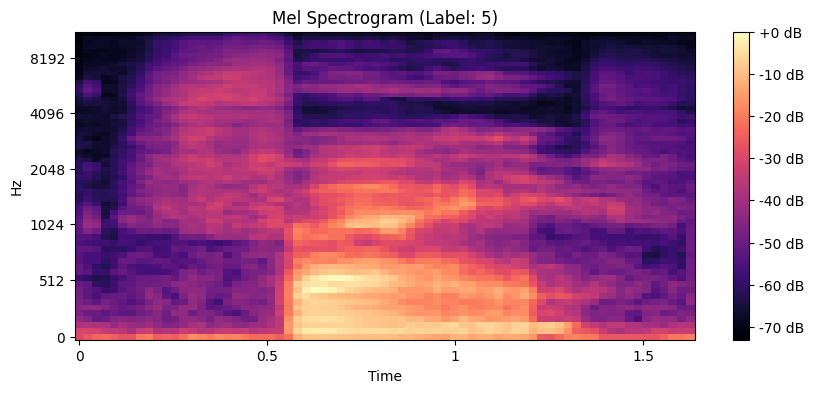

In [14]:
def extract_spectrogram(file_path, sr=48000, n_mels=64):
    """
    Converts an audio file into a mel spectrogram.

    Args:
        file_path (str): Path to the .wav file.
        sr (int): Sampling rate for librosa.
        n_mels (int): Number of mel bands.

    Returns:
        np.ndarray: Mel spectrogram array.
    """
    y, sr = librosa.load(file_path, sr=sr)

    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db


# Convert audio files per folder to spectrograms
spectrograms = [(extract_spectrogram(file), label) for file, label in audio_files]

# Display an example spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[0][0], sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram (Label: {spectrograms[0][1]})")
plt.show()

We can see that now we have 6000 spectograms.

In [15]:
print(len(spectrograms))

6000


Here, we find the longest audio file (the max width among the spectograms) that we will use right after to make every spectogram this size with padding (adding 0s, so silence). This is necessary because we need to feed the model with equal sized data.

In [16]:
max_width = max(spec.shape[1] for spec, _ in spectrograms)  # Find max time steps
print(f"Max spectrogram width: {max_width}")

Max spectrogram width: 94


So we make each spectogram the same length and then after converting to tensors for PyTorch, we do the train test split 80-20%.

In [17]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Define a fixed length (e.g., the max width in your dataset)
#fixed_length = 93  # Adjust based on your dataset
fixed_length = max_width

def pad_spectrogram(spectrogram, max_len=fixed_length):
    """Pads or truncates spectrograms to have a fixed time dimension."""
    if spectrogram.shape[1] > max_len:
        return spectrogram[:, :max_len]  # Truncate
    elif spectrogram.shape[1] < max_len:
        pad_width = max_len - spectrogram.shape[1]
        return np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')  # Pad with zeros
    return spectrogram

# Apply padding
X_padded = [pad_spectrogram(spec) for spec, _ in spectrograms]
y_labels = [label for _, label in spectrograms]

# Convert to PyTorch tensors
X_tensor = torch.tensor(np.array(X_padded), dtype=torch.float32)
y_tensor = torch.tensor(y_labels, dtype=torch.long)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_labels
)

We install optuna for hyperparameter tuning.

In [18]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.3 MB/s eta 0:00:00


Many things happen below: data storing and augmentation, split 20% of training set to validation, developing a CNN model with Optuna hyperparameter tuning.

Data augmentation (with 50% chance for each spectrogram): Time Masking: hides (masks) a random stripe along the time axis (like muting a short moment), Frequency Masking: hides a stripe along the frequency axis (like muting certain pitches). Data augmentation makes our model more robust.

The CNN model:
The CNN model is designed to classify spectrograms into 10 classes (spoken digits 0–9). It consists of two convolutional layers followed by max-pooling layers, which extract and downsample important audio features. The first convolution (conv1) takes in a single-channel input and outputs num_filters feature maps, followed by ReLU activation and 2x2 max pooling. The second convolution (conv2) doubles the number of feature maps and again applies ReLU and pooling. After these layers, the feature maps are flattened and passed through a fully connected layer (fc1) with fc_size units and ReLU activation. A dropout layer is then applied to reduce overfitting. The final output layer (fc2) maps to 10 class scores.

Hyperparameter tuning:
We try different combinations for
* num_filters → how many filters in the conv layers (controls feature complexity)
* fc_size → number of neurons in the fully connected layer
* batch_size → how many samples processed at once
* lr → learning rate for the optimizer
* dropout_rate → how much dropout is applied after the fully connected layer

We use only two epochs because training takes very long, even with num_workers=2.

In [19]:
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T
import optuna
from torch.utils.data import Dataset, DataLoader, random_split

# Define SpectrogramDataset
class SpectrogramDataset(Dataset):
    def __init__(self, spectrograms, labels, augment=False):
        self.spectrograms = torch.from_numpy(np.array(spectrograms)).float().unsqueeze(1)  # Add channel dim
        self.labels = torch.as_tensor(labels, dtype=torch.long)
        self.augment = augment
        self.time_masking = T.TimeMasking(time_mask_param=15)
        self.freq_masking = T.FrequencyMasking(freq_mask_param=8)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        spec = self.spectrograms[idx]
        label = self.labels[idx]
        if self.augment:
            if torch.rand(1).item() > 0.5:
                spec = self.time_masking(spec)
            if torch.rand(1).item() > 0.5:
                spec = self.freq_masking(spec)
        return spec, label

# Split data into train/validation/test
train_size = int(0.8 * len(X_train))  # 80% for training
val_size = len(X_train) - train_size  # 20% for validation

train_dataset, val_dataset = random_split(SpectrogramDataset(X_train, y_train, augment=True), [train_size, val_size])
test_dataset = SpectrogramDataset(X_test, y_test, augment=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self, num_filters, fc_size, dropout_rate=0.3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, num_filters, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(num_filters, num_filters * 2, kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(num_filters * 2 * (X_train.shape[1] // 4) * (X_train.shape[2] // 4), fc_size)
        self.fc2 = nn.Linear(fc_size, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define objective function for Optuna
def objective(trial):
    num_filters = trial.suggest_categorical("num_filters", [16, 32, 64])
    fc_size = trial.suggest_categorical("fc_size", [64, 128, 256])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    model = CNN(num_filters, fc_size, dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(10):  # 10 epochs
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2) #SET HIGHER, 2 IS ONLY FOR TEST

# Train final model with best hyperparameters
best_params = study.best_params
train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=best_params["batch_size"], shuffle=False, num_workers=2)

model = CNN(best_params["num_filters"], best_params["fc_size"])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_params["lr"])

for epoch in range(10):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


[I 2025-03-23 20:17:11,268] A new study created in memory with name: no-name-6a2b574f-4d13-4b2c-9be1-d869c9d60073
[I 2025-03-23 20:24:58,824] Trial 0 finished with value: 0.9552083333333333 and parameters: {'num_filters': 32, 'fc_size': 128, 'batch_size': 64, 'dropout_rate': 0.13100620581492423, 'lr': 0.0007212756438539254}. Best is trial 0 with value: 0.9552083333333333.
[I 2025-03-23 20:33:47,464] Trial 1 finished with value: 0.8791666666666667 and parameters: {'num_filters': 32, 'fc_size': 256, 'batch_size': 64, 'dropout_rate': 0.42047691460878933, 'lr': 0.000137208851372159}. Best is trial 0 with value: 0.9552083333333333.


The first time we tried the best CNN model found by Optuna achieved a validation accuracy of 97.08% using 32 convolutional filters, a fully connected layer with 256 units, a batch size of 16, a dropout rate of approximately 0.10, and a learning rate of 0.00012 (with Adam).

The second try (above) we get different parameters as you can see but the accuracy at the end will be similar.

Evaluating the model on the test set.

In [20]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradients needed for evaluation
        for spectrograms, labels in test_loader:
            outputs = model(spectrograms)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Get predicted class (highest logit)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total

    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    return avg_loss, accuracy

test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

Test Loss: 0.0889
Test Accuracy: 97.42%


The first time we tried, we got a convincing test accuracy of 97.17%

This second try that can be seen above with the parameters suggested by the second optuna hyperparameter tuning is a slightly higher.

Counting the number of missclassified instances during test.



In [21]:
def count_missclassified(model, test_loader):
    model.eval()
    misclassified_count = 0  # Counter for misclassified samples

    with torch.no_grad():
        for spectrograms, labels in test_loader:
            outputs = model(spectrograms)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                if predicted[i] != labels[i]:  # Misclassified
                    misclassified_count += 1  # Increment misclassified count

    # Display the number of misclassified samples
    print(f"Total misclassified samples: {misclassified_count}")

count_missclassified(model, test_loader)

Total misclassified samples: 31


Here in this next cell we can listen to a few misclassified samples. The cell is long and might not be the most efficient because to find the file location for the misclassified samples (that we need to be able to play the audio) we loop through the audio files again, convert them to a spectogram and compare the spectograms to the misclassified sample we are looking for. Not efficient but migh be more understandable in terms of the workflow of the whole project than storing the file location of each sample during train test split and training.

In [22]:
import torch
from IPython.display import Audio
import librosa
import numpy as np
import matplotlib.pyplot as plt

def show_predictions(model, test_loader, audio_files, num_samples=5, sr=48000, n_mels=64):
    model.eval()
    incorrect_samples = []

    with torch.no_grad():
        for spectrograms, labels in test_loader:
            outputs = model(spectrograms)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                if predicted[i] != labels[i]:  # Misclassified
                    incorrect_samples.append((spectrograms[i], labels[i], predicted[i]))

                if len(incorrect_samples) >= num_samples:
                    break
            if len(incorrect_samples) >= num_samples:
                break

    # Print the number of misclassified samples
    print(f"Total misclassified samples: {len(incorrect_samples)}")

    # Loop through incorrect samples and find the corresponding audio file
    for i, (spec, true_label, pred_label) in enumerate(incorrect_samples):
        print(f"Misclassified Sample {i+1}: True label: {true_label}, Predicted label: {pred_label}")

        # Loop through audio_files and check if the audio matches the misclassified sample
        for audio_path, label in audio_files:
            # Load the audio file from audio_path
            audio_data, _ = librosa.load(audio_path, sr=sr)

            # Extract mel spectrogram from the audio file
            audio_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=n_mels)
            audio_spec_db = librosa.power_to_db(audio_spec, ref=np.max)

            # Resize both spectrograms to have the same time axis (columns)
            min_length = min(spec.shape[2], audio_spec_db.shape[1])  # Find the smaller number of frames
            spec_resized = spec.squeeze(0).cpu().numpy()[:, :min_length]  # Trim or pad model spectrogram
            audio_spec_db_resized = audio_spec_db[:, :min_length]  # Trim or pad audio spectrogram

            # Compare spectrograms using a simple norm-based comparison
            spec_norm = np.linalg.norm(spec_resized - audio_spec_db_resized)

            # If the spectrogram is very similar, we assume it's the same audio
            if spec_norm < 1e-4:  # Adjust threshold as needed
                # Play the audio for the misclassified sample
                display(Audio(audio_path))  # Play the misclassified audio sample
                print(f"Audio of misclassified sample {i+1} is now playing...\n")
                break

# Example usage
show_predictions(model, test_loader, audio_files)

Total misclassified samples: 5
Misclassified Sample 1: True label: 9, Predicted label: 1


Audio of misclassified sample 1 is now playing...

Misclassified Sample 2: True label: 3, Predicted label: 2


Audio of misclassified sample 2 is now playing...

Misclassified Sample 3: True label: 2, Predicted label: 0


Audio of misclassified sample 3 is now playing...

Misclassified Sample 4: True label: 4, Predicted label: 5


Audio of misclassified sample 4 is now playing...

Misclassified Sample 5: True label: 1, Predicted label: 2


Audio of misclassified sample 5 is now playing...



# Transfer Learning

This section applies transfer learning using the pre-trained facebook/wav2vec2-base-960h model from Hugging Face to classify spoken digits from 0 to 9 based on raw audio inputs. The model is adapted using Parameter-Efficient Fine-Tuning (PEFT) with LoRA (Low-Rank Adaptation) to minimize the number of trainable parameters. A custom Dataset class loads and pads audio files to a fixed duration and extracts features using Wav2Vec2FeatureExtractor. The classification head is trained using cross-entropy loss, and training is accelerated with tqdm progress bars. LoRA adapters are injected into the attention projections (q_proj and v_proj) of the Wav2Vec2 encoder, allowing the model to learn the digit classification task efficiently with limited compute.

In [23]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

We use sr=16000 and not 48000 (that we used above). 48000 fits our data more but this model was trained on 16000.

In [24]:
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification
from peft import LoraConfig, PeftModel
from tqdm import tqdm


# Custom subclass to maintain correct forward signature
class CustomWav2Vec2ForSequenceClassification(Wav2Vec2ForSequenceClassification):
    def forward(self, input_values=None, attention_mask=None, labels=None):
        return super().forward(input_values=input_values, attention_mask=attention_mask, labels=labels)

# Dataset class
class SpokenDigitDataset(Dataset):
    def __init__(self, audio_file_label_list, feature_extractor, sr=16000, max_duration=1.0):
        self.audio_file_label_list = audio_file_label_list
        self.feature_extractor = feature_extractor
        self.sr = sr
        self.max_length = int(sr * max_duration)

    def __len__(self):
        return len(self.audio_file_label_list)

    def __getitem__(self, idx):
        path, label = self.audio_file_label_list[idx]
        waveform, _ = librosa.load(path, sr=self.sr)

        if len(waveform) < self.max_length:
            padding = self.max_length - len(waveform)
            waveform = np.pad(waveform, (0, padding), mode='constant')
        else:
            waveform = waveform[:self.max_length]

        inputs = self.feature_extractor(
            waveform,
            sampling_rate=self.sr,
            return_tensors="pt",
            padding=True,
            return_attention_mask=True
        )

        input_values = inputs["input_values"].squeeze(0)
        attention_mask = inputs["attention_mask"].squeeze(0)

        return input_values, attention_mask, label

# Train function with tqdm
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0

    for input_values, attention_mask, labels in tqdm(dataloader, desc="Training"):
        input_values = input_values.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_values=input_values, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(dataloader)

# Evaluation function with tqdm
def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for input_values, attention_mask, labels in tqdm(dataloader, desc="Evaluating"):
            input_values = input_values.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_values=input_values, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    return correct / total

# Main script
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")

# Use your actual audio_files list
# audio_files = [(path1, label1), (path2, label2), ...]
train_files, test_files = train_test_split(audio_files, test_size=0.2, stratify=[lbl for _, lbl in audio_files])

train_dataset = SpokenDigitDataset(train_files, feature_extractor)
test_dataset = SpokenDigitDataset(test_files, feature_extractor)

''' train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8) '''
# fast version, good version above
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load base model
base_model = CustomWav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base-960h",
    num_labels=10
)

# Define LoRA config
lora_config = LoraConfig(
    r=4,                    #!!!!SET BACK TO 8
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_CLS"
)

# Wrap base model with PEFT (LoRA)
model = PeftModel(model=base_model, peft_config=lora_config)
model.to(device)

# Training setup
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(1):
    print(f"\nEpoch {epoch + 1}")
    train_loss = train(model, train_loader, criterion, optimizer, device)
    acc = evaluate(model, test_loader, device)
    print(f"Train Loss = {train_loss:.4f}, Test Accuracy = {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of CustomWav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


Evaluating: 100%|██████████| 300/300 [06:47<00:00,  1.36s/it]

Train Loss = 2.1944, Test Accuracy = 0.9317


For the first try, that trained for 58 minutes we got an accuracy of 0.6692 on the test set. This was only one training loop so with bigger computational power the model could be fine tuned more efficiently, but based on out previous results it can be said that for this simple task, we do not need such a complicated model, it's not necessary to get a good accuracy.

For the second try the accuracy was 0.93 with rougly the same training and testing time.